In [43]:
%matplotlib inline
import seaborn as sns, pandas as pd, numpy as np
from matplotlib import pyplot as plt

# Data design:

Image of design (Pathway/Signaling): http://postimg.org/image/gyxs8adwh/

Files:

- all_genes: Gene expression
- design: Drug effects on Rats
- mod_nodevalues: Value for each node in metabolic activity (Metabolic/Signaling activities)
- mod_activities: Propagated value through pathway activity (last node of above)
- mod_genevalues: Metabolic genes (subset of all genes)
- path_vals: ???
- signaling_genes: subset of genes involved in cell signalling



## RNA_Seq data:

In [4]:
pd.version.short_version

'0.16.2'

In [9]:
%%file load_data.py
import pandas as pd, sys, os

dtype = sys.argv[1]

if dtype.lower() in 'rnaseq':
    print "loading rnaseq data"
    rnaseq_all_genes = pd.read_csv('../DataRNAseq_all_genes.csv', sep=',', index_col=0, header=0)
    rnaseq_all_genes.index.name = 'Entrez_ID'
    rnaseq_effector_genes = pd.read_csv('../Data/RNASeq/rnaseq_effector_path_vals.csv', sep=',', index_col=0, header=0)
    rnaseq_mod_activities = pd.read_csv('../Data/RNASeq/rnaseq_metabolic_mod_activities.csv', sep=',', index_col=0, header=0)
    rnaseq_mod_genevalues = pd.read_csv('../Data/RNASeq/rnaseq_metabolic_mod_genevalues.csv', sep=',', index_col=0, header=0)
    rnaseq_mod_nodevalues = pd.read_csv('../Data/RNASeq/rnaseq_metabolic_mod_nodevalues.csv', sep=',', index_col=0, header=0)
    rnaseq_signaling_genes = pd.read_csv('../Data/RNASeq/rnaseq_signaling_genes.csv', sep=',', index_col=0, header=0)
    rnaseq_design = pd.read_csv('../Data/RNASeq/rnaseq_design.csv', index_col=1)
    rnaseq_design.columns = [u'idx', u'Drug/Chemical', u'Effect', u'Set']
    
    print "rnaseq_all_genes:", rnaseq_all_genes.shape
    print "rnaseq_effector_genes:", rnaseq_effector_genes.shape
    print "rnaseq_mod_activities:", rnaseq_mod_activities.shape
    print "rnaseq_mod_genevals:", rnaseq_mod_genevalues.shape
    print 'rnaseq_mod_nodevals:', rnaseq_mod_nodevalues.shape
    print 'rnaseq_signaling_genes:', rnaseq_signaling_genes.shape
    print 'rnaseq_design:', rnaseq_design.shape
else:
    print "loading microarray data"
    micro_all_genes = pd.read_csv('../Data/microarray/microarray_all_genes.csv', sep=',', index_col=0, header=0)
    micro_all_genes.index.name = 'Entrez_ID'
    micro_effector_genes = pd.read_csv('../Data/microarray/microarray_effector_path_vals.csv', sep=',', index_col=0, header=0)
    micro_mod_activities = pd.read_csv('../Data/microarray/microarray_metabolic_mod_activities.csv', sep=',', index_col=0, header=0)
    micro_mod_genevalues = pd.read_csv('../Data/microarray/microarray_metabolic_mod_genevalues.csv', sep=',', index_col=0, header=0)
    micro_mod_nodevalues = pd.read_csv('../Data/microarray/microarray_metabolic_mod_nodevalues.csv', sep=',', index_col=0, header=0)
    micro_signaling_genes = pd.read_csv('../Data/microarray/microarray_signaling_genes.csv', sep=',', index_col=0, header=0)
    micro_design = pd.read_csv('../Data/microarray/microarray_design.csv', index_col=1)
    micro_design.columns = [u'idx', u'Drug/Chemical', u'Effect', u'Set']


    print "micro_all_genes:", micro_all_genes.shape
    print "micro_effector_genes:", micro_effector_genes.shape
    print "micro_mod_activities:", micro_mod_activities.shape
    print "micro_mod_genevals:", micro_mod_genevalues.shape
    print 'micro_mod_nodevals:', micro_mod_nodevalues.shape
    print 'micro_signaling_genes:', micro_signaling_genes.shape
    print 'micro_design:', micro_design.shape

Overwriting load_data.py


In [10]:
%run load_data.py microarray

loading microarray data
micro_all_genes: (13613, 105)
micro_effector_genes: (1044, 105)
micro_mod_activities: (89, 105)
micro_mod_genevals: (201, 105)
micro_mod_nodevals: (462, 105)
micro_signaling_genes: (2184, 105)
micro_design: (105, 4)


In [128]:
print "all:", rnaseq_all_genes.shape
print "effector:", effector_genes.shape
print "mod_activities:", mod_activities.shape
print "mod_genevals:", mod_genevalues.shape
print 'mod_nodevals:', mod_nodevalues.shape
print 'signaling_genes:', signaling_genes.shape
print 'design:', design.shape

all: (11216, 104)
effector: (1044, 104)
mod_activities: (89, 104)
mod_genevals: (172, 104)
mod_nodevals: (462, 104)
signaling_genes: (2184, 104)
design: (104, 4)


## Design data

In [118]:
train_idx = design.Set == 'TRAINING SET'
test_idx = ~train_idx

In [120]:
labels = design.Effect

## RNASeq all data

In [123]:
random_sub = np.random.choice(all_genes.index, 5)

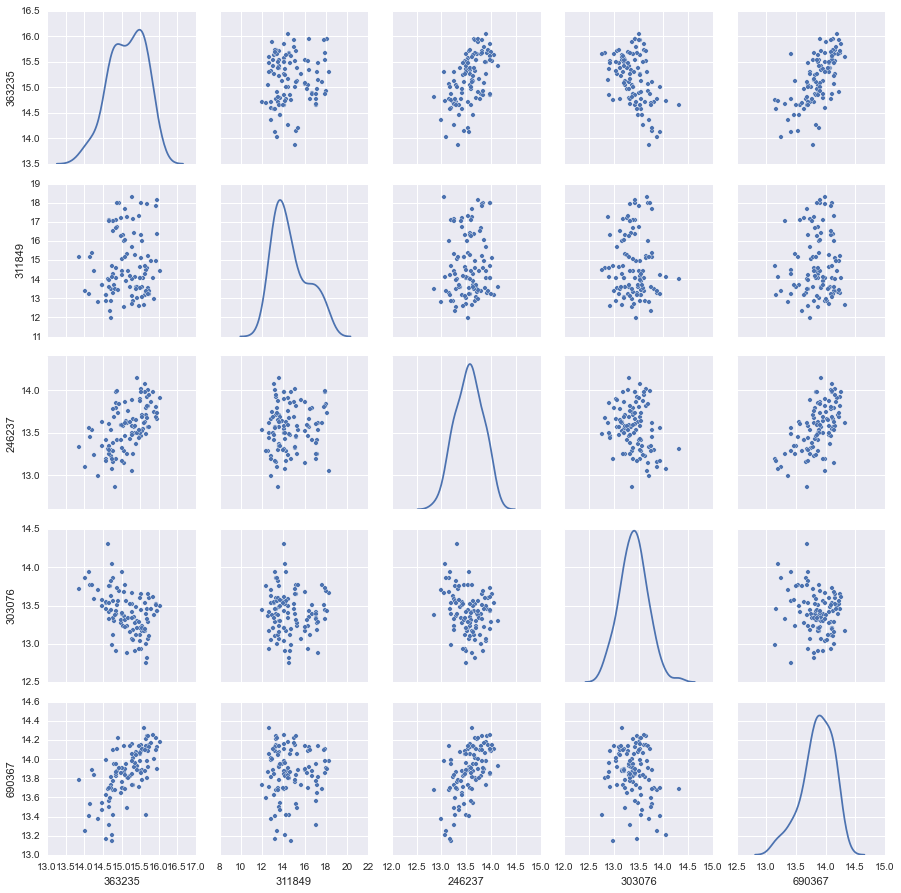

In [124]:
sns.pairplot(all_genes.loc[random_sub].T, diag_kind='kde', kind='scatter')

In [30]:
import sklearn

In [33]:
from sklearn import manifold, decomposition

In [66]:
p = decomposition.PCA(n_components=5)

In [67]:
X = pd.DataFrame(p.fit_transform(genes.T.values, 5))

In [69]:
X['labels'] = labels

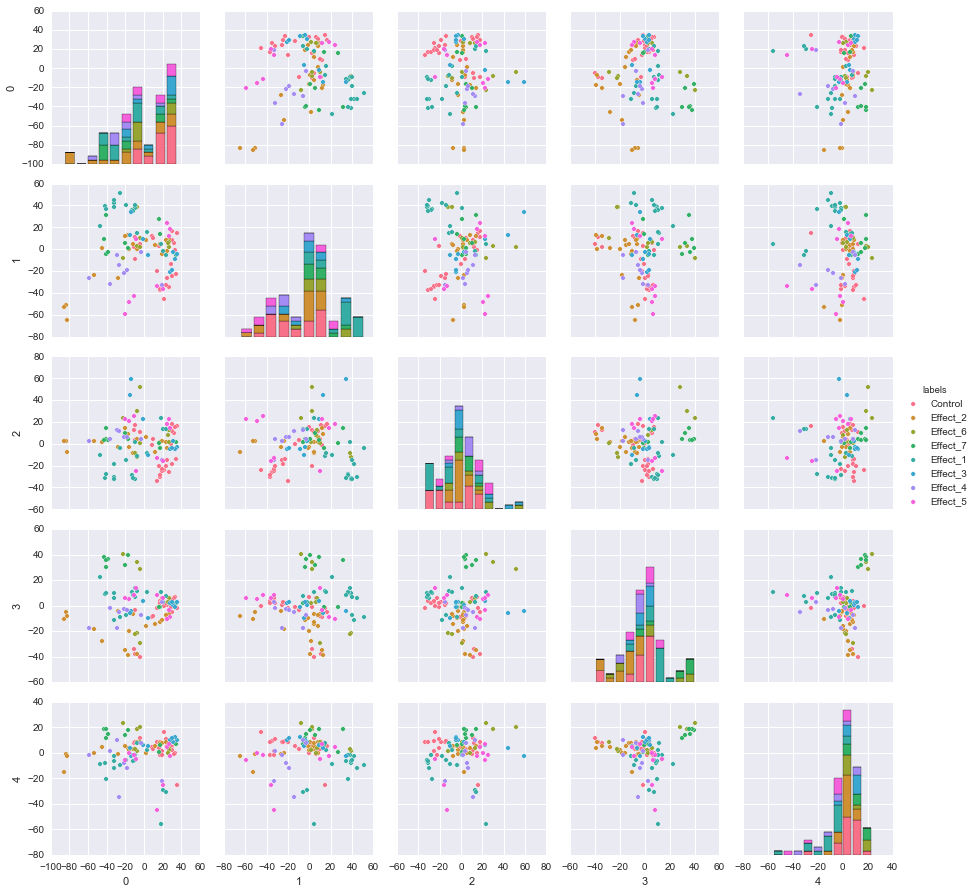

In [70]:
sns.pairplot(X, hue='labels')

## Metabolic Genes:


In [75]:
effector_genes = pd.read_csv('../Data/RNASeq/rnaseq_effector_path_vals.csv', sep=',eff', index_col=0, header=False)

In [97]:
X_effector = pd.DataFrame(p.fit_transform(effector_genes.T), index=effector_genes.columns).join(labels)

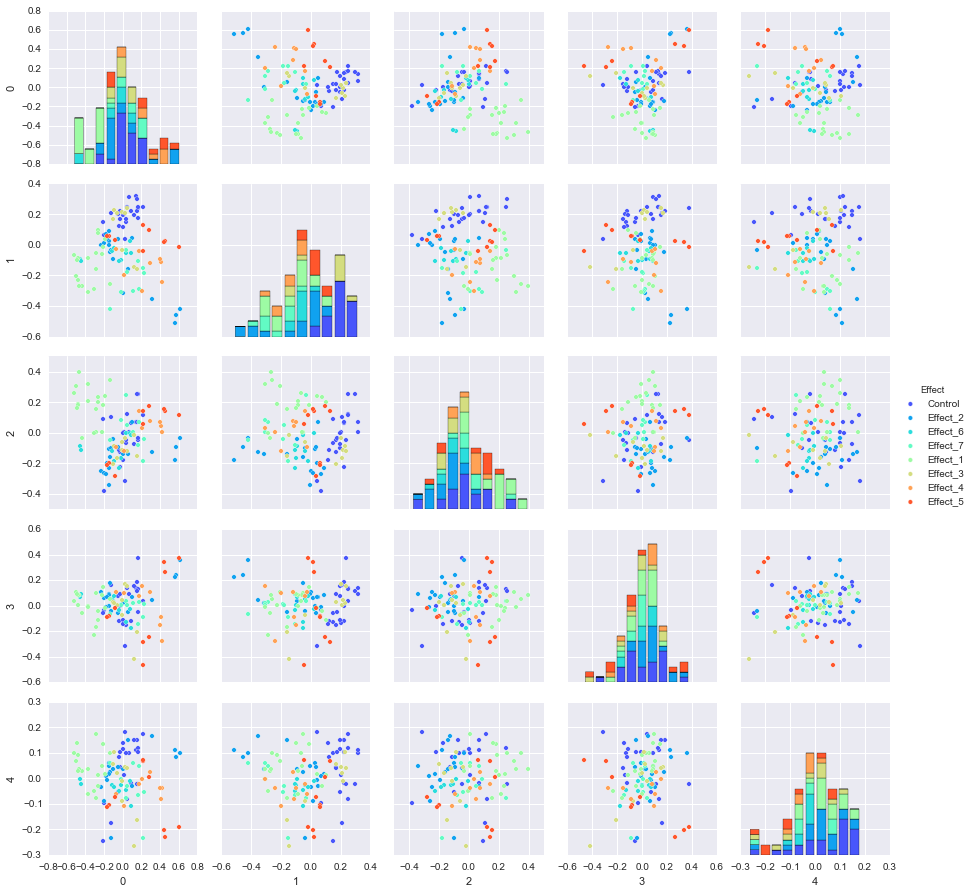

In [103]:
sns.pairplot(X_effector, hue='Effect', palette='rainbow')